In [355]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics

In [356]:
df = pd.read_csv("covid_data.csv")

## Listing All the Variables

In [357]:
print(df.shape)
variables = list(df.columns)
print(f"{len(variables)} variables")
variables

(238234, 67)
67 variables


['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

## Checking Missing Values

In [358]:
df.isnull().sum()

iso_code                                        0
continent                                   13427
location                                        0
date                                            0
total_cases                                 13459
                                            ...  
population                                   1025
excess_mortality_cumulative_absolute       230242
excess_mortality_cumulative                230242
excess_mortality                           230191
excess_mortality_cumulative_per_million    230242
Length: 67, dtype: int64

In [359]:
df.isnull().sum().sum()

7290942

## Predicting Total Deaths per Million

Here, we predict the total deaths per million based on the latest death rate (per million), 

In [360]:
dfmodel1 = df[(df['total_deaths_per_million'].notna()) &
              (df['gdp_per_capita'].notna()) &
              (df['life_expectancy'].notna()) &
              (df['human_development_index'].notna()) &
              (df['total_vaccinations_per_hundred']) & 
              (df['people_fully_vaccinated_per_hundred']) &
             (df['female_smokers'].notna()) & 
             (df['median_age'].notna()) &
             (df['weekly_hosp_admissions'].notna()) &
             (df['new_vaccinations'].notna())]
dfmodel1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
20487,BEL,Europe,Belgium,2021-01-18,679771.0,932.0,2078.286,20472.0,37.0,50.000,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
20488,BEL,Europe,Belgium,2021-01-19,681250.0,1479.0,1989.714,20554.0,82.0,51.429,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
20489,BEL,Europe,Belgium,2021-01-20,684256.0,3006.0,2001.000,20572.0,18.0,46.000,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
20490,BEL,Europe,Belgium,2021-01-21,686827.0,2571.0,1991.571,20620.0,48.0,46.571,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
20491,BEL,Europe,Belgium,2021-01-22,689271.0,2444.0,2026.000,20675.0,55.0,46.143,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224896,USA,North America,United States,2022-11-18,98306861.0,55042.0,44209.286,1077079.0,530.0,346.143,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
224897,USA,North America,United States,2022-11-19,98311464.0,4603.0,44149.286,1077090.0,11.0,347.714,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
224898,USA,North America,United States,2022-11-20,98314732.0,3268.0,44280.286,1077090.0,0.0,347.571,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
224899,USA,North America,United States,2022-11-21,98357289.0,42557.0,43233.714,1077284.0,194.0,340.857,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN


In [361]:
dfmodel1 = dfmodel1.sort_values(['date']).groupby('location').tail(1)
dfmodel1.to_csv("dfmodel1.csv")
dfmodel1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
201331,ESP,Europe,Spain,2022-03-03,11078028.0,23140.0,18290.143,100239.0,202.0,153.857,...,31.4,NaN,2.970,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN
194559,SVN,Europe,Slovenia,2022-05-08,1015779.0,323.0,746.286,6611.0,0.0,2.571,...,25.0,NaN,4.500,81.32,0.917,2119843.0,5379.7,10.64,-0.80,2537.782279
117240,LVA,Europe,Latvia,2022-07-10,839846.0,0.0,512.429,5869.0,0.0,1.286,...,51.0,NaN,5.570,75.29,0.866,1850654.0,8534.7,11.94,-3.78,4611.721046
197417,ZAF,Africa,South Africa,2022-07-16,3999751.0,1285.0,354.571,101918.0,23.0,6.000,...,33.2,43.993,2.320,64.13,0.709,59893884.0,NaN,NaN,NaN,NaN
50430,HRV,Europe,Croatia,2022-08-21,1206587.0,639.0,835.000,16571.0,12.0,10.714,...,39.9,NaN,5.540,78.49,0.851,4030361.0,21156.1,15.48,6.10,5249.182393
223780,GBR,Europe,United Kingdom,2022-09-04,23521796.0,0.0,4131.000,207039.0,43.0,50.286,...,24.7,NaN,2.540,81.32,0.932,67508936.0,157824.1,9.62,6.50,2337.825321
192137,SGP,Asia,Singapore,2022-10-07,1942204.0,5934.0,4899.571,1628.0,3.0,1.429,...,28.3,NaN,2.400,83.62,0.938,5637022.0,NaN,NaN,NaN,NaN
32995,BGR,Europe,Bulgaria,2022-11-06,1281252.0,97.0,430.857,37920.0,4.0,8.571,...,44.4,NaN,7.454,75.05,0.816,6781955.0,NaN,NaN,NaN,NaN
42992,CHL,South America,Chile,2022-11-11,4826234.0,7235.0,7003.714,61953.0,30.0,30.857,...,41.5,NaN,2.110,80.18,0.851,19603736.0,NaN,NaN,NaN,NaN
160900,NOR,Europe,Norway,2022-11-13,1466568.0,45.0,133.857,4286.0,0.0,6.857,...,20.7,NaN,3.600,82.40,0.957,5434324.0,NaN,NaN,NaN,NaN


In [362]:
df[df['location'] == "United Kingdom"].isna().sum().sum() #Checking number of missings according to country

16091

In [363]:
#get all the numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

dfmodel1Numeric = dfmodel1.select_dtypes(include=numerics)

In [364]:
#get the correlation matrix
corrMatrix = dfmodel1Numeric.corr()
corrMatrix

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
total_cases,1.000000,0.770650,0.777438,0.933084,0.886406,0.925872,0.072170,0.202780,0.117929,0.073195,...,-0.212509,NaN,0.082821,0.082383,0.197102,0.961323,0.996542,-0.592097,0.597046,-0.610099
new_cases,0.770650,1.000000,0.934036,0.567597,0.664806,0.686098,0.194355,0.660450,0.466046,-0.153670,...,-0.007345,NaN,0.445125,0.171617,0.164453,0.661861,-0.461855,0.792700,0.364495,0.468061
new_cases_smoothed,0.777438,0.934036,1.000000,0.552726,0.591426,0.682948,0.251348,0.601689,0.563535,-0.115899,...,-0.002919,NaN,0.439906,0.253270,0.175390,0.645810,0.996726,-0.565984,0.641487,-0.612552
total_deaths,0.933084,0.567597,0.552726,1.000000,0.934828,0.925053,-0.125582,-0.012133,-0.084499,0.186637,...,-0.243570,NaN,-0.151182,-0.068909,0.079748,0.983599,0.998904,-0.561665,0.624710,-0.587218
new_deaths,0.886406,0.664806,0.591426,0.934828,1.000000,0.969697,-0.139037,0.131621,-0.011470,0.093621,...,-0.216457,NaN,-0.078637,0.001224,0.131018,0.939949,0.981665,-0.360816,0.778991,-0.438356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
population,0.961323,0.661861,0.645810,0.983599,0.939949,0.940410,-0.128143,0.082578,-0.018463,0.090185,...,-0.229015,NaN,-0.078448,-0.093774,0.049491,1.000000,0.997883,-0.577318,0.610090,-0.598424
excess_mortality_cumulative_absolute,0.996542,-0.461855,0.996726,0.998904,0.981665,0.995233,-0.450033,-0.547347,-0.916269,-0.315893,...,-0.523926,NaN,-0.912048,0.499665,0.634044,0.997883,1.000000,-0.523134,0.650430,-0.550810
excess_mortality_cumulative,-0.592097,0.792700,-0.565984,-0.561665,-0.360816,-0.456119,-0.519232,0.536474,0.159810,0.956789,...,0.555846,NaN,0.755119,-0.462921,-0.902611,-0.577318,-0.523134,1.000000,0.196899,0.903977
excess_mortality,0.597046,0.364495,0.641487,0.624710,0.778991,0.721105,-0.899854,0.161203,-0.772487,0.462132,...,-0.465143,NaN,-0.492981,0.529188,0.153922,0.610090,0.650430,0.196899,1.000000,-0.079880


In [365]:
deathRateCol = corrMatrix['total_deaths_per_million'] 
deathRateCol[abs(corrMatrix['total_deaths_per_million']) > 0.2] 

new_cases_per_million                     -0.390913
new_cases_smoothed_per_million            -0.228149
total_deaths_per_million                   1.000000
new_deaths_smoothed_per_million            0.353457
reproduction_rate                         -0.351918
weekly_icu_admissions_per_million          0.610334
weekly_hosp_admissions                     0.209364
weekly_hosp_admissions_per_million         0.589666
total_tests                               -1.000000
new_tests                                 -1.000000
total_tests_per_thousand                   1.000000
new_tests_per_thousand                    -1.000000
new_tests_smoothed                        -1.000000
new_tests_smoothed_per_thousand            1.000000
positive_rate                             -1.000000
tests_per_case                             1.000000
total_boosters                             0.237511
total_vaccinations_per_hundred            -0.429880
people_vaccinated_per_hundred             -0.280252
people_fully

In [366]:
corrMatrix.to_csv("corrMatrix.csv")

In [367]:
X = dfmodel1[["new_vaccinations"]]
Y = dfmodel1[["total_deaths_per_million"]]

In [368]:
#Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [369]:
#Normalization
x_scaler = preprocessing.StandardScaler().fit(X_train)
X_train = x_scaler.transform(X_train)

In [370]:
y_scaler = preprocessing.StandardScaler().fit(y_train)
y_train = y_scaler.transform(y_train)

In [371]:
model1=LinearRegression()
model1.fit(X_train , y_train)

LinearRegression()

In [372]:
y_pred= model1.predict(X_train)

In [373]:
MSE = metrics.mean_squared_error(y_train, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([MSE, RMSE], index=['MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MSE,0.965336
RMSE,0.982515


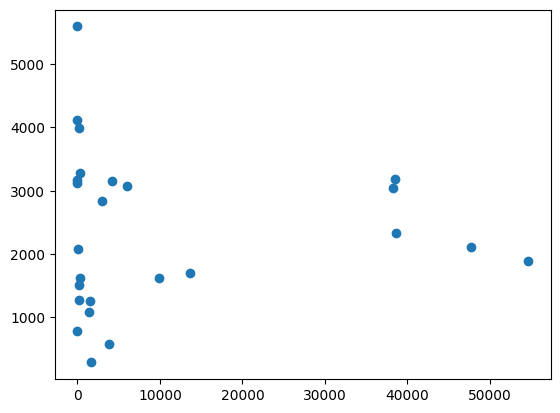

In [374]:
plt.scatter(dfmodel1["new_vaccinations"], dfmodel1["total_deaths_per_million"])

In [375]:
dfmodel2 = df[(df['total_deaths_per_million'].notna()) &
              (df['gdp_per_capita'].notna()) &
              (df['life_expectancy'].notna()) &
              (df['human_development_index'].notna()) &
              (df['total_vaccinations_per_hundred']) & 
              (df['people_fully_vaccinated_per_hundred']) &
             (df['female_smokers'].notna()) & 
             (df['median_age'].notna()) &
             (df['weekly_hosp_admissions'].notna()) &
             (df['new_vaccinations'].notna())]
dfmodel2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
20487,BEL,Europe,Belgium,2021-01-18,679771.0,932.0,2078.286,20472.0,37.0,50.000,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
20488,BEL,Europe,Belgium,2021-01-19,681250.0,1479.0,1989.714,20554.0,82.0,51.429,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
20489,BEL,Europe,Belgium,2021-01-20,684256.0,3006.0,2001.000,20572.0,18.0,46.000,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
20490,BEL,Europe,Belgium,2021-01-21,686827.0,2571.0,1991.571,20620.0,48.0,46.571,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
20491,BEL,Europe,Belgium,2021-01-22,689271.0,2444.0,2026.000,20675.0,55.0,46.143,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224896,USA,North America,United States,2022-11-18,98306861.0,55042.0,44209.286,1077079.0,530.0,346.143,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
224897,USA,North America,United States,2022-11-19,98311464.0,4603.0,44149.286,1077090.0,11.0,347.714,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
224898,USA,North America,United States,2022-11-20,98314732.0,3268.0,44280.286,1077090.0,0.0,347.571,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
224899,USA,North America,United States,2022-11-21,98357289.0,42557.0,43233.714,1077284.0,194.0,340.857,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN


In [376]:
dfmodel2 = dfmodel2.sort_values(['date']).groupby('location')
dfmodel2
#dfmodel2.head()

In [377]:
X = dfmodel2[["gdp_per_capita", "total_cases", "total_deaths_per_million"]]

In [378]:
X.head(5)

,gdp_per_capita,total_cases,total_deaths_per_million
224200,54225.446,18391296.0,966.526
224201,54225.446,18612128.0,976.314
224202,54225.446,18823663.0,984.762
224203,54225.446,18949178.0,989.190
224204,54225.446,19167138.0,994.842
...,...,...,...
192127,85535.383,1897307.0,286.854
192128,85535.383,1900761.0,286.854
192129,85535.383,1904192.0,286.854
192130,85535.383,1907907.0,287.031


In [389]:
x_scaler = preprocessing.StandardScaler().fit(X_train)
X_train = x_scaler.transform(X_train)

In [390]:
distortions = []
mapping = {}
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_train)
    distortions.append(sum(np.min(cdist(x_train, kmeans.cluster_centers_, 'euclidean'), axis=1)) / x_train.shape[0])
    mapping[k] = sum(np.min(cdist(x_train, kmeans.cluster_centers_, 'euclidean'), axis=1)) / x_train.shape[0]

In [391]:
for key, val in mapping.items():
    print(f'{key} : {val}')

1 : 0.2463703279034643
2 : 0.21558862976957044
3 : 0.17270276968389606
4 : 0.14384291933553311
5 : 0.12504174046341163
6 : 0.11162133048729012
7 : 0.1024776010517176
8 : 0.09339165406127173
9 : 0.08684430878042061


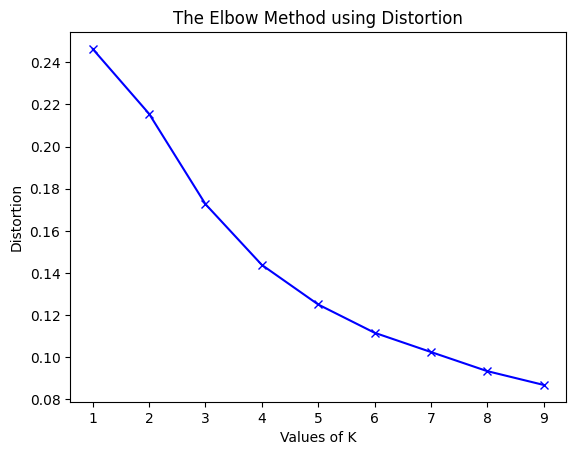

In [392]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [395]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(x_train)

KMeans(n_clusters=6)

In [396]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [397]:
plt.scatter(X['gdp_per_capita'], X['total_cases'], c=kmeans.labels_, cmap='viridis');

IndexError: Column(s) ['gdp_per_capita', 'total_cases', 'total_deaths_per_million'] already selected

In [398]:
import plotly.express as px
fig = px.scatter_3d(X, x='gdp_per_capita', y='total_cases', z='total_deaths_per_million',
              color=kmeans.labels_)
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of [0, 1] but received: gdp_per_capita